# 1. 数据集说明

这是一份来自淘宝的用户行为数据，时间区间为 2014-11-17 到 2014-12-17，总计 12,256,906 条记录，大小为 500多MB，包含 6 个字段

数据可以从kaggle下载:https://www.kaggle.com/datasets/yijiajia/taobao-userbehavior

字段包含：

- user_id：用户身份，脱敏
- item_id：商品ID，脱敏
- behavior_type：用户行为类型（包含点击、收藏、加购物车、支付四种行为，分别用数字1、2、3、4表示
- user_geohash：地理位置
- item_category：品类ID（商品所属的品类）
- time：用户行为发生的时间

# 2. 数据处理

## 2.1 导入数据处理相关库

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_theme()

## 2.2 导入数据集

In [2]:
df = pd.read_csv('taobao_full.csv')
df.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,98145908,290208520,1,NaN,13926,2014-12-16 21


**通过df.info()方法获取数据集信息**  
**数据集包含122w+条数据，除了user_geohash字段外,其他字段没有空值**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12256906 entries, 0 to 12256905
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        int64 
 1   item_id        int64 
 2   behavior_type  int64 
 3   user_geohash   object
 4   item_category  int64 
 5   time           object
dtypes: int64(4), object(2)
memory usage: 561.1+ MB


## 2.3 缺失值处理

In [5]:
df.isnull().sum()

user_id                0
item_id                0
behavior_type          0
user_geohash     8334824
item_category          0
time                   0
date                   0
hour                   0
weekday                0
dtype: int64

## 2.4 重复值处理

In [7]:
#查看是否有重复值
df.duplicated().sum()
#删除重复值
df.drop_duplicates(keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)

## 2.5 转换时间戳

将原数据集时间戳格式转换成标准格式，提取date,hour,weekday列方便后续分析

In [4]:
#Timestamp
df['time'] = pd.to_datetime(df['time'],format='%Y-%m-%d %H')
df['date'] = df['time'].dt.date
df['hour'] = df['time'].dt.hour
df['weekday'] = df['time'].dt.strftime('%A')
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['weekday'] = pd.Categorical(df['weekday'],categories = weekdays,ordered = True)
df.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour,weekday
0,98047837,232431562,1,NaN,4245,2014-12-06 02:00:00,2014-12-06,2,Saturday
1,97726136,383583590,1,NaN,5894,2014-12-09 20:00:00,2014-12-09,20,Tuesday
2,98607707,64749712,1,NaN,2883,2014-12-18 11:00:00,2014-12-18,11,Thursday
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10:00:00,2014-12-06,10,Saturday
4,98145908,290208520,1,NaN,13926,2014-12-16 21:00:00,2014-12-16,21,Tuesday


In [8]:
df.describe()

,user_id,item_id,behavior_type,item_category,time,hour
count,8.164040e+06,8.164040e+06,8.164040e+06,8.164040e+06,8164040,8.164040e+06
mean,7.147382e+07,2.022900e+08,1.151846e+00,6.837000e+03,2014-12-04 12:47:08.728027648,1.520080e+01
min,4.913000e+03,6.400000e+01,1.000000e+00,2.000000e+00,2014-11-18 00:00:00,0.000000e+00
25%,3.574526e+07,1.013781e+08,1.000000e+00,3.695000e+03,2014-11-26 21:00:00,1.100000e+01
50%,7.270324e+07,2.020590e+08,1.000000e+00,6.146000e+03,2014-12-05 01:00:00,1.600000e+01
75%,1.069264e+08,3.035627e+08,1.000000e+00,1.027500e+04,2014-12-12 08:00:00,2.100000e+01
max,1.424559e+08,4.045625e+08,4.000000e+00,1.408000e+04,2014-12-18 23:00:00,2.300000e+01
std,4.121085e+07,1.167544e+08,5.401788e-01,3.805719e+03,NaN,6.177866e+00


# 3. 数据分析及可视化

## 3.1 用户流量分析

计算总访问量 PV,总用户量 UV

In [9]:
pv = df[df['behavior_type'] == 1]['user_id'].count()

uv = df['user_id'].nunique()

print(f'pv = {pv} \nuv = {uv} ')

pv = 7479078 
uv = 10000 


计算日均访问量 PV, 日均用户量 UV

In [10]:
daily_pv = df[df['behavior_type'] == 1].groupby('date')['user_id'].count()
daily_uv = df.groupby(by = ['date'])['user_id'].nunique()

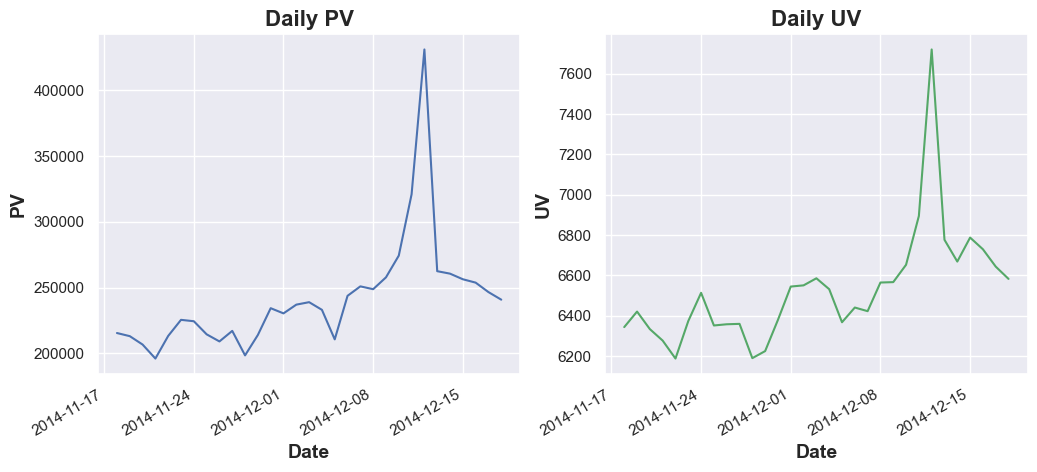

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 第一个子图
ax1.plot(daily_pv, label='PV')
ax1.set_xlabel('Date', fontweight='bold', fontsize=14)
ax1.set_ylabel('PV', fontweight='bold', fontsize=14)
ax1.set_title('Daily PV', fontweight='bold', fontsize=16)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax1.grid(True)

# 第二个子图
ax2.plot(daily_uv, color='g', label='UV')
ax2.set_xlabel('Date', fontweight='bold', fontsize=14)
ax2.set_ylabel('UV', fontweight='bold', fontsize=14)
ax2.set_title('Daily UV', fontweight='bold', fontsize=16)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax2.grid(True)

# 自动旋转日期标签
fig.autofmt_xdate()

plt.show()

## 3.2 复购率

In [12]:
round(
    (df[df['behavior_type'] == 4].groupby('user_id')['item_id'].count()>2).sum() /
    df[df['behavior_type'] == 4]['user_id'].count()
    ,3)


0.067

## 3.3 漏斗分析(用户转化率)

In [13]:
pv = len(df[df['behavior_type'] == 1])
fav = len(df[df['behavior_type'] == 2])
cart = len(df[df['behavior_type'] == 3])
buy = len(df[df['behavior_type'] == 4])
convert = {
    'PV':pv,
    'FAV':fav,
    'Cart':cart,
    'Buy':buy
}
converion = pd.DataFrame([convert])
converion

,PV,FAV,Cart,Buy
0,7479078,240919,333371,110672


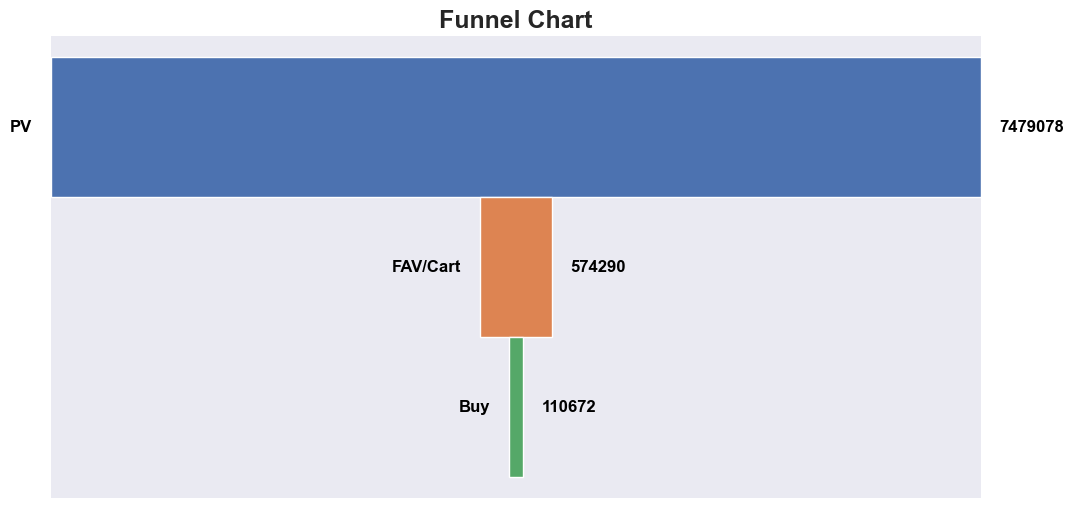

In [14]:
stages = ['PV', 'FAV/Cart', 'Buy']
values = [pv,fav+cart,buy]

# 计算漏斗的宽度（相对于最大值）
widths = [value / max(values) for value in values]

# 创建漏斗图
fig, ax = plt.subplots(figsize=(12, 6))

# 迭代每个阶段，绘制水平条形图
for i, (stage, width, value) in enumerate(zip(stages, widths, values)):
    ax.barh(stage, width, height=1, left=(1 - width) / 2, label=f'{value} ({width*100:.1f}%)')

# 显示值标签
for i, (stage, width, value) in enumerate(zip(stages, widths, values)):
    ax.text(0.5 + width / 2 + 0.02, i, str(value), ha='left', va='center', color='black', fontweight='bold')
    ax.text(0.5 - width / 2 - 0.02, i, stage, ha='right', va='center', color='black', fontweight='bold')
for spine in ax.spines.values():
    spine.set_visible(False)

# 添加标签和标题
ax.set_title('Funnel Chart',fontweight='bold',fontsize = 18)

# 去掉刻度
ax.tick_params(left=False, bottom=False)
ax.set_xticks([])
ax.set_yticks([])
#
ax.invert_yaxis()
ax.margins(x=0)
plt.show()


## 3.4 活跃时间分布

In [15]:
pv_hour = df[df['behavior_type'] == 1].groupby('hour')['user_id'].count()
fav_hour = df[df['behavior_type'] == 2].groupby('hour')['user_id'].count()
cart_hour = df[df['behavior_type'] == 3].groupby('hour')['user_id'].count()
buy_hour = df[df['behavior_type'] == 4].groupby('hour')['user_id'].count()

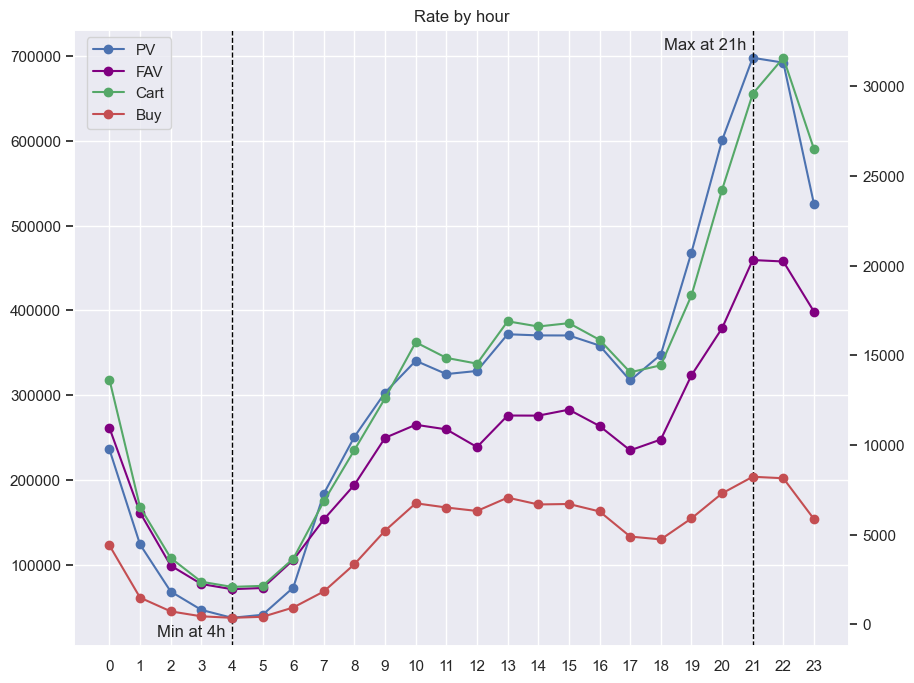

In [39]:
min_x = pv_hour.idxmin()
max_x = pv_hour.idxmax()
min_y = pv_hour.min()
max_y = pv_hour.max()

fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.plot(pv_hour,label = 'PV',marker = 'o')
ax1.set_xticks(pv_hour.index)
ax2 = ax1.twinx()
ax2.plot(fav_hour, label = 'FAV',color = 'purple',marker = 'o')
ax2.plot(cart_hour, label = 'Cart',color = 'g',marker = 'o')
ax2.plot(buy_hour, label = 'Buy',color = 'r',marker = 'o')
plt.title('Rate by hour')

ax1.axvline(min_x, color='black', linestyle='--',linewidth = 1)
ax1.text(min_x - 0.2, 15000, f'Min at {min_x}h', horizontalalignment='right')
ax1.axvline(max_x, color='black', linestyle='--',linewidth = 1)
ax1.text(max_x -0.2, max_y+10000, f'Max at {max_x}h', horizontalalignment='right')
fig.legend(loc = 'upper left',bbox_to_anchor=(0.13,0.88))
ax2.grid(visible=False)
plt.show()

- 晚上21点-22点之间是用户一天中最活跃的时候，凌晨 4 点，则是活跃度最低的时候

## 3.5 一周用户活跃分布

In [17]:
pv_week = df[df['behavior_type'] == 1].groupby('weekday')['user_id'].count()
fav_week = df[df['behavior_type'] == 2].groupby('weekday')['user_id'].count()
cart_week = df[df['behavior_type'] == 3].groupby('weekday')['user_id'].count()
buy_week = df[df['behavior_type'] == 4].groupby('weekday')['user_id'].count()

weekday
Monday        959830
Tuesday      1178420
Wednesday    1181843
Thursday     1218445
Friday       1035926
Saturday      933407
Sunday        971207
Name: user_id, dtype: int64

**绘制stack bar图表**

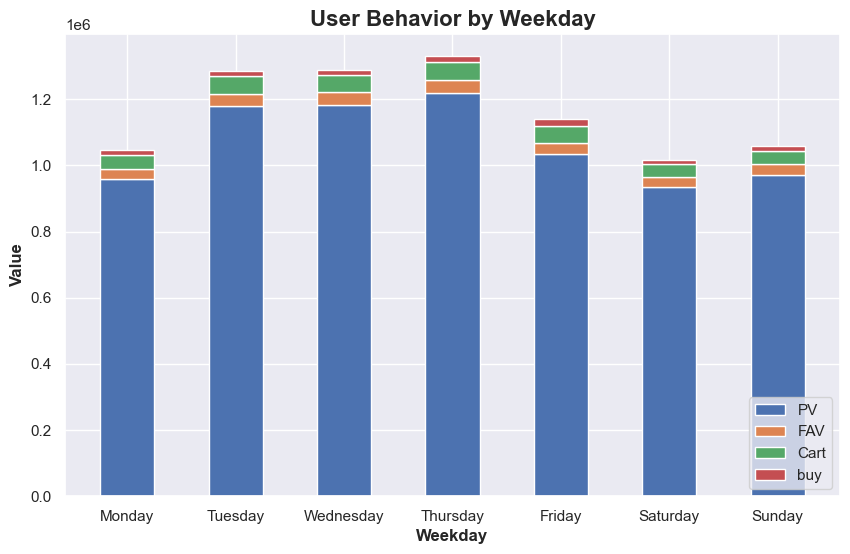

In [18]:
# 创建一个索引数组，用于放置每个柱子的x位置
ind = np.arange(len(pv_week.index))

# 每个柱子的宽度
width = 0.5

# 绘制堆叠柱状图
fig, ax = plt.subplots(figsize =(10,6))

# 第一个数据集
p1 = ax.bar(ind, pv_week, width, label='PV')

# 第二个数据集，堆叠在第一个数据集上
p2 = ax.bar(ind, fav_week, width, bottom=pv_week, label='FAV')

# 第三个数据集，堆叠在第二个数据集上
p3 = ax.bar(ind, cart_week, width, bottom=np.array(pv_week) + np.array(fav_week), label='Cart')

p4 = ax.bar(ind, buy_week, width, bottom=np.array(pv_week) + np.array(fav_week)+np.array(cart_week), label='buy')

ax.set_xticks(ind)
ax.set_xticklabels(pv_week.index)

ax.set_xlabel('Weekday',fontweight='bold')
ax.set_ylabel('Value',fontweight='bold')
plt.title('User Behavior by Weekday',fontweight='bold',fontsize = 16)
ax.legend(loc = 'lower right')

plt.show()


## 3.6 留存率分析

In [41]:
df['date'] = pd.to_datetime(df['date'])

# 计算每日活跃用户数
daily_active_users = df.groupby('date')['user_id'].nunique().reset_index()
daily_active_users.columns = ['date', 'active_users']

# 计算1-7日留存率
retention_rates = []
for i in range(1, 8):
    retention = {}
    for start_date in df['date'].unique():
        end_date = start_date + pd.Timedelta(days=i)
        if end_date in df['date'].unique():
            start_users = set(df[df['date'] == start_date]['user_id'])
            end_users = set(df[df['date'] == end_date]['user_id'])
            retention_rate = len(start_users & end_users) / len(start_users)
            retention[start_date] = retention_rate
    retention_rates.append(pd.DataFrame.from_dict(retention, orient='index', columns=[f'{i} Day Retention']))

# 合并留存率表格
retention_df = pd.concat(retention_rates, axis=1).reset_index()
retention_df.columns = ['date'] + [f'{i} Day Retention' for i in range(1, 8)]

retention_df[-10:]

,date,1 Day Retention,2 Day Retention,3 Day Retention,4 Day Retention,5 Day Retention,6 Day Retention,7 Day Retention
20,2014-12-08,0.798446,0.785801,0.801341,0.866392,0.775594,0.757160,0.774985
21,2014-12-09,0.803990,0.814804,0.872982,0.781298,0.766220,0.776881,0.771094
22,2014-12-10,0.819904,0.874925,0.785478,0.768491,0.778112,0.773001,0.765634
23,2014-12-11,0.889759,0.782565,0.766609,0.783580,0.770380,0.758921,0.748622
24,2014-12-12,0.775907,0.752202,0.763601,0.755440,0.743782,0.730699,NaN
25,2014-12-13,0.790142,0.797963,0.777597,0.769628,0.760626,NaN,NaN
26,2014-12-14,0.809088,0.783743,0.771296,0.766347,NaN,NaN,NaN
27,2014-12-15,0.803448,0.779726,0.767939,NaN,NaN,NaN,NaN
28,2014-12-16,0.795066,0.778125,NaN,NaN,NaN,NaN,NaN
29,2014-12-17,0.792564,NaN,NaN,NaN,NaN,NaN,NaN


**绘制heatmap**

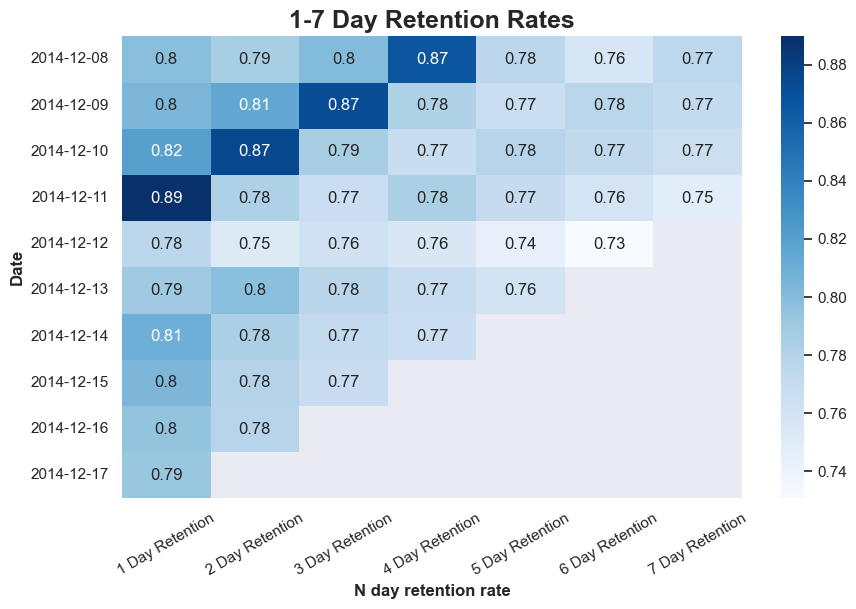

In [42]:
if 'date' in retention_df.columns:
    retention_df['date'] = retention_df['date'].dt.strftime('%Y-%m-%d')
    retention_df.set_index('date',inplace=True)
plt.figure(figsize=(10, 6))
sns.heatmap(retention_df[-10:],annot = True,cmap ='Blues')
plt.title('1-7 Day Retention Rates',fontweight = 'bold', fontsize = 18)
plt.xlabel('N day retention rate',fontweight = 'bold')
plt.xticks(rotation=30)
plt.ylabel('Date',fontweight = 'bold')
plt.grid(False)
plt.show()


- 双12当天的留存率较高，其他时间段处在正常状态